# Lesson 22 - Introduction to Classification

### The following topics are discussed in this notebook:
* Overview of the supervised learning workflow. 
* Introduction to the Scikit-Learn API. 
* Training, validation, and test sets. 
* Classification algorithms
* Accuracy as a metric for classification tasks. 


## Introduction to Classification

As mentioned in the previous lesson, the goal in a supervised learning task is to produce a **model** that we can use to predict the value of a label $y$ given values for a set of features, $x^{(1)}, x^{(2)}, ..., x^{(n)}$. In a classification problem, the label represents a category into which the observation has been classified. 

In this lesson, we will provide a general overview of the workflow in supervised learning by walking through an example of a classification task. We will simplify some of the steps in this introductory example, and will not explain all of the details.  

## Scikit-Learn

The most popular Python library for machine learning is the Scikit-Learn (`sklearn`) package. This package provides functions for creating supervised learning models, as well as for performing unsupervised learning tasks. Scikit-Learn also provides tools for working with and preparing data for use in creating models. 

The tools provided by Scikit-Learn are arranged into various modules. We will typically not import the entire package, but will instead import the required tools as needed. 

## Load Packages

We will begin by loading three packages: Numpy, Pandas, and Matplotlib.

In [1]:
import numpy as np               
import pandas as pd              
import matplotlib.pyplot as plt  

## Iris Dataset

For this example, we will be working with the Iris Dataset. This data set is a real-world "toy" dataset that is often used to demonstrate concepts in data science. The iris dataset contains information about several flowers selected from three different species of iris: versicolor, setosa, and virginica. 

For each flower, we have five pieces of information:
* The sepal length of the flower. 
* The sepal width of the flower. 
* The petal length of the flower.
* The petal width of the flower. 
* The species of the flower. 

The original iris dataset contains 150 observations. We will be working with a modified version of this dataset that contains 600 observations. The extra 450 observations were randomly generated to be similar to existing observations. 

![Iris](https://drbeane.github.io/files/images/303/Iris.png)

## Load and Explore Data

The data is stored in the tab-separated file `data/iris_mod.txt`. We will use Pandas to load the data into a DataFrame called `iris`. We will then look at the first 10 observations in the DataFrame.

In [2]:
iris = pd.read_csv('data/iris_mod.txt', sep='\t')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.3,3.2,5.0,2.0,virginica
1,5.3,3.8,1.9,0.4,setosa
2,7.5,2.9,5.8,1.5,virginica
3,6.5,3.0,4.8,1.6,versicolor
4,6.8,3.1,4.9,1.5,versicolor
5,6.1,2.3,4.4,1.3,versicolor
6,4.9,3.5,1.6,0.4,setosa
7,6.3,3.1,5.7,1.7,virginica
8,4.9,3.5,1.5,0.2,setosa
9,5.5,3.9,1.3,0.4,setosa


We can use the Seaborn package to create a pairs plot of the the dataset. 

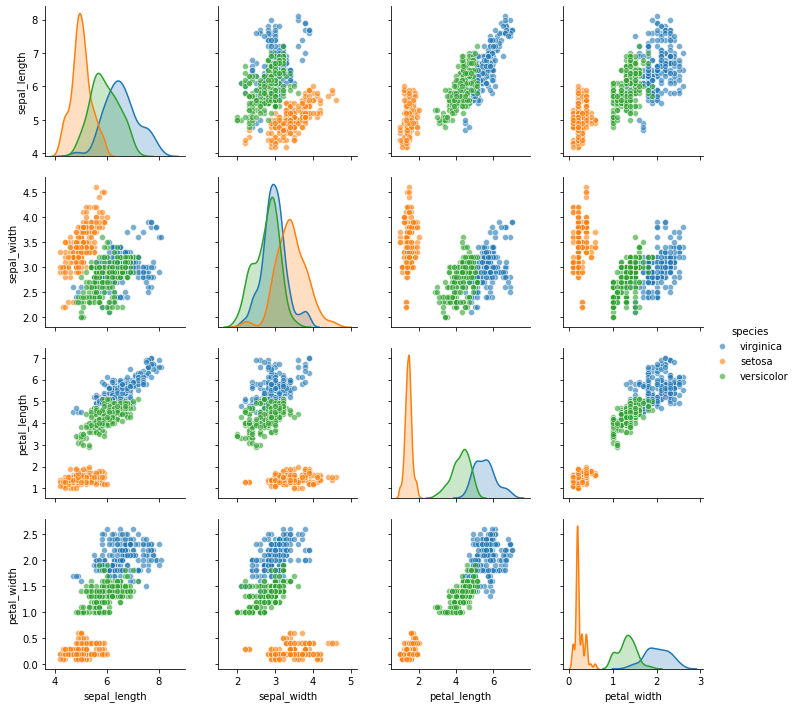

In [3]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.pairplot(iris, hue="species", plot_kws={'alpha': 0.6})
plt.show()

## The Goal

Our goal is to build a model that will allow us to predict the species of a newly observed flower for which we have measurements for sepal length, sepal width, petal length, and petal width. 

We will consider three different models: a logistic regression model, and a decision tree model, and a K-nearest neighbors model. We will use the package Scikit-Learn to construct, assess, and apply both of these models. 

Scikit-Learn is a library that contains implementations of many machine learning algorithms, as well as useful tools for evaluatting models, processing data, and generating synthetic data sets. We will use this package extensively in this class. 

## Prepare the Data

The Scikit-Learn model-building API requires our data to be in a specific format. In particular, the features should be represented numerically, and contained in a DataFrame or 2D Numpy Array, while the labels should be contained in a list, series, or 1D Numpy array. 

In the next cell, we create a feature array called `X`, as well as a label array called `y`. 

In [4]:
X = iris.iloc[:,:4].values
y = iris.iloc[:,4].values

print(type(X))
print(type(y))

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Shape of X: (600, 4)
Shape of y: (600,)


## Splitting the Data into Training, Validation, and Test Sets

When creating a supervised learning model, it is important to evaluate the model's performance. For a classification model, for example, we might want to measure the model's **accuracy**, or in other words, the proportion of observations for which it makes correct predictions. 

Some supervised learning models are very good at "remembering" the data on which they are trained. Such a model might perform very well when evaluated on this data, while performing very poorly on new data that it did not see during training. This phenomenon is called **overfitting**. An overfit model performs unreasonably well on the training data, but will not generalize well to new observations. 

For this reason, it is important to evaluate your model using **out-of-sample data**, or in other words, using data that your model did not see during training. One of the most straight-forward methods for estimating a model's out-of-sample performance is to split the data into three sets: the **training set**, the **validation set**, and the **testing set**. The purpose of each of these sets are described below:

* The **training set** is used to train any models that we create. We will provide the training set to a machine learning algorithm as input, and the algorithm will generate a model as its output. 

* The **validation set** is out-of-sample data used to compare the models we have created. We will often wish to consider multiple different learning algorithms in a supervised learning task. Each algorithm will produce a single model that has been trained on the training set, and we will then compare the performance of the resulting models on the (previously unseen) validation set to help us select our final model. 

* The **testing set** is out-of-sample data that is used to assess the performance of our final model. This set is used only once, at the very end of the model building process. 

## Size of Training, Validation, and Test Sets

There is no set rule for how many observations should go into each of these sets, but there are two guiding principles to follow: You want to include as many observations as possible in the training set, but you don't want the validation or testing sets to be too small to give you reasonable estimates of the out-of-sample performance. If the data set is fairly large, you might use 80% of it for training, 10% for validation, and 10% for testing. This is referred to as an 80/10/10 split. In a small dataset, an 80/10/10 split might create validation and testing sets that are too small. In these cases, you might consider a 60/20/20 split, or a 40/30/30 split. 

## Using Scikit-Learn to Split Data

When splitting your data into training, validation, and testing sets, it is import to first randomly shuffle the observations in your data. We could do this manually, but fortunately, Scikit-Learn provides a function called `train_test_split` for creating a train/test/validation split. We use this function in the cell below to perform an 80/10/10 split on our data. 

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_hold, y_train, y_hold =\
    train_test_split(X, y, test_size = 0.20,
                     random_state=1, stratify=y)

X_valid, X_test, y_valid, y_test =\
    train_test_split(X_hold, y_hold, test_size = 0.50,
                     random_state=1, stratify=y_hold)

_, train_dist = np.unique(y_train, return_counts=True)
_, valid_dist = np.unique(y_valid, return_counts=True)
_, test_dist = np.unique(y_test, return_counts=True)


print('Training features shape:  ', X_train.shape)
print('Validation features shape:', X_valid.shape)
print('Test features shape:      ', X_test.shape)
print()
print('Training labels shape:    ', y_train.shape)
print('Validation labels shape:  ', y_valid.shape)
print('Test labels shape:        ', y_test.shape)
print()
print('Training label dist:      ', train_dist)
print('Validation label dist:    ', valid_dist)
print('Test label dist:          ', test_dist)

Training features shape:   (480, 4)
Validation features shape: (60, 4)
Test features shape:       (60, 4)

Training labels shape:     (480,)
Validation labels shape:   (60,)
Test labels shape:         (60,)

Training label dist:       [160 160 160]
Validation label dist:     [20 20 20]
Test label dist:           [20 20 20]


We mentioned that the training/validation/test set approach is the most straight-forward method of estimating a model's out-of-sample performance. More sophisticated methods exist. In particular, there is a more advanced method called **K-Fold Cross-Validation** that will produce better estimates of a model's performance, at the cost of being more computationally expensive. This is somewhat advanced topic that we are not ready to formally introduce at this point. 

## Creating Models in Scikit-Learn

Scikit-Learn includes implementations for several machine learning algorithms. All models in Scikit-Learn are created and applied with a similar syntax, regardless of the type of the model. 

To build a machine learning model in Scikit-Learn, you must first select a specific model type, or model algorithm that we wish to use. This will determine the general structure of the model being built, but not any of the details about how it will generate its predictions. 

Each algorithm will have a special class associated with it. Assume that `ModelType` is such a class. We start the modeling process by creating an instance of this class. Some algorithms require us to specify certain model options, or **hyperparameters** at this step. 

    my_model = ModelType(arg1, arg2, ...)
    
You should think of `my_model` as being a blank model at this point. It has not yet seen our dataset, and has not yet learned how to generate predictions. Every `sklearn` model comes with a `fit()` method that we can use train it. 

    my_model.fit(X_train, y_train)
    
That's it! We now have a working model. If we want to use the model to generate predictions based on a particular set of feature values, we can use the model's `predict()` method. 

    predictions = my_model.predict(X_values)

## Model Building: Logistic Regression

Logistic regression is a classification algorithm that is designed to create linear boundaries between the different classes. In the next cell, we will use Scikit-Learn to create and train (or fit) a logistic regression model. We will then use the model to predict the species of a newly observed iris. 

In [6]:
from sklearn.linear_model import LogisticRegression

# Creating Model
model_1 = LogisticRegression(solver='lbfgs')
model_1.fit(X_train, y_train)

# Create new observation
x0 = [[4, 2.5, 2, 0.5]]

# Generate prediction
pred_0_m1 = model_1.predict(x0)
print(pred_0_m1)

# Predicted probabilities
prob_0_m1 = model_1.predict_proba(x0)
print(np.round(prob_0_m1, 4))

['setosa']
[[0.6021 0.3979 0.    ]]


## Model Building: Decision Trees

A decision tree algorithm employs a "divide and conquer" strategy to create a rules-based model for making classifications. We now use Scikit-Learn to create and train a decision model. As before, we will use the model to predict the species of a newly observed iris. 

In [7]:
from sklearn.tree import DecisionTreeClassifier

np.random.seed(1)

# Creating Model
model_2 = DecisionTreeClassifier(max_depth=7)
model_2.fit(X_train, y_train)

# Generate prediction
pred_0_m2 = model_2.predict(x0)
print(pred_0_m2)

# Predicted probabilities
prob_0_m2 = model_2.predict_proba(x0)
print(np.round(prob_0_m2, 4))

['setosa']
[[1. 0. 0.]]


## Model Building: K-Nearest Neighbors

The K-Nearest Neighbors classifier is a distance-based algorithm. Several different KNN models can be created for a particular training set, and these models are distinguished from one another by the choice of a hyperparameter `K`. 

To classify an observation according to this algorithm, you would first find the `K` training observations that are nearest to the observation being classified. The distance between two observations is based on the differences between their feature values. Once the `K` nearest neighbors are identified, they are asked to vote on the predicted class for the new observation, with each of the neighbors submitting their own class as the vote. 

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Creating Model
model_3 = KNeighborsClassifier(n_neighbors=15)
model_3.fit(X_train, y_train)

# Generate prediction
pred_0_m3 = model_3.predict(x0)
print(pred_0_m3)

# Predicted probabilities
prob_0_m3 = model_3.predict_proba(x0)
print(np.round(prob_0_m3, 4))

['setosa']
[[1. 0. 0.]]


## Comparing Models

For the single iris that we considered above, the three models we created all agreed on the predicted species of the flower. It will not always be the case that models agree in their predictions. Consider the following example.

In [9]:
obs0 = [4, 0.5, 2, 0.5]
obs1 = [2, 5.5, 6, 2.5]
obs2 = [5, 4.5, 4.5, 0.5]
obs3 = [5.5, 4, 5, 1.8]
X_new = [obs0, obs1, obs2, obs3]

print('Model 1 Predictions:', model_1.predict(X_new))
print('Model 2 Predictions:', model_2.predict(X_new))
print('Model 3 Predictions:', model_3.predict(X_new))

Model 1 Predictions: ['versicolor' 'virginica' 'versicolor' 'virginica']
Model 2 Predictions: ['setosa' 'virginica' 'setosa' 'versicolor']
Model 3 Predictions: ['versicolor' 'virginica' 'versicolor' 'versicolor']


We can use DataFrames to dispaly these predictions in a more readable format. 

In [10]:
predictions = pd.DataFrame([
    model_1.predict(X_new), 
    model_2.predict(X_new), 
    model_3.predict(X_new)
])
predictions.columns = ['obs0', 'obs1', 'obs2', 'obs3']
predictions.index = ['Model 1', 'Model 2', 'Model 3']
predictions

,obs0,obs1,obs2,obs3
Model 1,versicolor,virginica,versicolor,virginica
Model 2,setosa,virginica,setosa,versicolor
Model 3,versicolor,virginica,versicolor,versicolor


## Scoring Models Using Accuracy

The three models above disagree in their prediction for the three of the flowers. So which model should we use? 

It would perhaps be instructive to see how well the models actually performed on the training data. To that end, we will calculate each model's **accuracy** on the training set. We will start with `model_1`, the logistic regression model. 

In [11]:
# Logistic Regression Model Accuracy

mod1_pred_train = model_1.predict(X_train)
mod1_train_acc = np.mean(mod1_pred_train == y_train)
print(mod1_train_acc)

0.9604166666666667


We will now calculate the training accuracy for the decision tree model, `model_2`. 

In [12]:
# Decision Tree Model Accuracy

mod2_pred_train = model_2.predict(X_train)
mod2_train_acc = np.mean(mod2_pred_train == y_train)
print(mod2_train_acc)

1.0


Finally, we calculate the training accuracy for the decision tree model, `model_3`. 

In [13]:
# KNN Model Accuracy

mod3_pred_train = model_3.predict(X_train)
mod3_train_acc = np.mean(mod3_pred_train == y_train)
print(mod3_train_acc)

0.9708333333333333


The logistic regression achieved 96% accuracy on the training set, the decision tree model achieved 100% training accuracy, and the KNN model achieved 97% training accuracy. That might seem to indicate that the decision tree model is the best of the three. However, as mentioned before, we are more interested in a model's out-of-sample performance than in its performance on the training data. For this reason, we use the validation set to compare models. So, we need to calculate the **validation accuracy** for each of the three models. 

We could calculate the validation accuracies in the same way that we calculated the training accuracies above. However, our models actually come equipped with `score()` methods that will do this work for us. In the cell below, we will use the `score()` method to calculate training and validation accuracies for all three of our models. 

In [14]:
print("Model 1 Training Accuracy:  ", model_1.score(X_train, y_train))
print("Model 1 Validation Accuracy:", model_1.score(X_valid, y_valid))
print()
print("Model 2 Training Accuracy:  ", model_2.score(X_train, y_train))
print("Model 2 Validation Accuracy:", model_2.score(X_valid, y_valid))
print()
print("Model 3 Training Accuracy:  ", model_3.score(X_train, y_train))
print("Model 3 Validation Accuracy:", model_3.score(X_valid, y_valid))

Model 1 Training Accuracy:   0.9604166666666667
Model 1 Validation Accuracy: 0.95

Model 2 Training Accuracy:   1.0
Model 2 Validation Accuracy: 0.95

Model 3 Training Accuracy:   0.9708333333333333
Model 3 Validation Accuracy: 0.9833333333333333


Let's address these results one model at a time. 

**Model 1**
The logistic regresesion model achieved 95% accuracy on the validation set. That is slightly lower than its training accuracy. That suggests that the model will perform approximately as well on new data as it did on the training data. 

**Model 2**
The decision tree model also achieved 95% accuracy on the validation set. That is notably lower than then 100% accuracy it got on the training set. This is an example of **overfitting**. The algorithm learned the nuances of the training set very well. Too well, in fact. It creates a model that performs very well on the data it was provided, but does not generalize well to new observations. 

**Model 3**
The KNN model achieved a 98.3% validation accuracy, which was actually a bit higher than its performance on the training set. While we wouldn't expect a model to have a validation score that is higher than its testing score, that can certain happen as a result of the random sampling used to create the sets. This does not mean that the model is expected to do better on new data than on the training data, but it does suggest that the model will likely perform about as well on new data as on the training data. 

Since the KNN model has the highest validation accuracy, we will select it as our final model. We conclude by using the test set to provide us with an estimate of this model's out-of-sample accuracy. 

In [16]:
print("Model 3 Test Accuracy:   ", model_3.score(X_test, y_test))

Model 3 Test Accuracy:    0.9833333333333333
